## Initialization Phase + Data Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('malaysia_produce.csv')
df_LCU, df_SLC, df_USD, df_PPI = [df[df.Element == 'Producer Price (LCU/tonne)'], 
df[df.Element == 'Producer Price (SLC/tonne)'],
df[df.Element == 'Producer Price (USD/tonne)'], df[df.Element == 'Producer Price Index (2014-2016 = 100)']]

In [21]:
df_LCU.head()

,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
29,MYS,01/01/2004,31/12/2004,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2004,7021,Annual value,9130
30,MYS,01/01/2005,31/12/2005,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2005,7021,Annual value,11080
31,MYS,01/01/2006,31/12/2006,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2006,7021,Annual value,17780
32,MYS,01/01/2007,31/12/2007,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2007,7021,Annual value,12600
33,MYS,01/01/2008,31/12/2008,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2008,7021,Annual value,14650


In [88]:
# Initialize directory of Items with Appropriate date range
valid_year_dictionary = {}

def check_year_order(l):
    return all([l[i] + 1 == l[i + 1] for i in range(len(l) - 1)])

for each in df_LCU.Item.unique():
    valid_year_dictionary[each] = check_year_order(df_LCU[df_LCU.Item == each].Year.unique())
    #print (each, check_year_order(df_LCU[df_LCU.Item == each].Year.unique()))

In [98]:
# Check valid_year_directionary total count
count_true, count_false = 0, 0
for key, values in valid_year_dictionary.items():
    if values: count_true +=1
    else: count_false+=1
        
print (count_true)
print (count_false)

38
22


In [108]:
df10 = pd.DataFrame(data = valid_year_dictionary)

ValueError: If using all scalar values, you must pass an index

In [10]:
df_LCU.Year.value_counts().sort_index()

1993     28
1994     28
1995     30
1996     29
1997     30
1998     30
1999     30
2000     38
2001     30
2002     29
2003     38
2004     44
2005     45
2006     46
2007     45
2008     45
2009     51
2010    424
2011    443
2012    426
2013    519
2014    509
2015     83
2016    429
2017    440
2018    427
2019    477
2020    441
Name: Year, dtype: int64

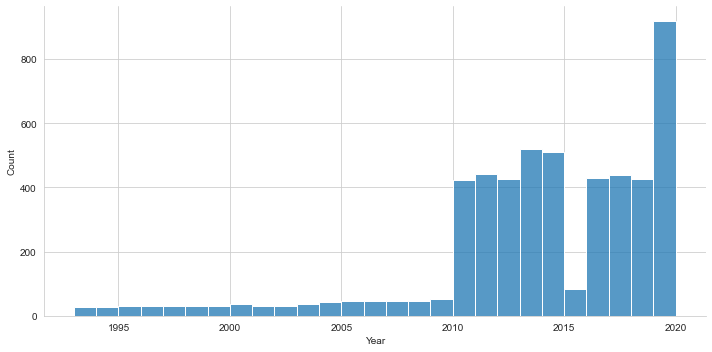

In [8]:
sns.displot(data = df_LCU, x = 'Year', kind = 'hist', binwidth = 1, aspect=2)